# Start

In [3]:
# This Pyth|on 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os
import shutil

In [9]:
!pip install "protobuf==3.20.3"

In [ ]:



base_path = r"D:\ML_project_data\5"  # your dataset
images_path = f"{base_path}/images"
meta_path = f"{base_path}/meta/meta"

output_root = r"D:\ML_project_data\5\model_data"
train_dir = f"{output_root}/train"
test_dir = f"{output_root}/test"

# Create output folders
os.makedirs(output_root, exist_ok=True)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Read split files
with open(f"{meta_path}/train.txt") as f:
    train_files = [line.strip() for line in f]

with open(f"{meta_path}/test.txt") as f:
    test_files = [line.strip() for line in f]

# Move images into train/test folder structure
for fpath in train_files:
    cls = fpath.split("/")[0]
    os.makedirs(f"{train_dir}/{cls}", exist_ok=True)
    shutil.copy(f"{images_path}/{fpath}.jpg", f"{train_dir}/{cls}/")

for fpath in test_files:
    cls = fpath.split("/")[0]
    os.makedirs(f"{test_dir}/{cls}", exist_ok=True)
    shutil.copy(f"{images_path}/{fpath}.jpg", f"{test_dir}/{cls}/")


ImportError: cannot import name 'runtime_version' from 'google.protobuf' (c:\Users\Admin\anaconda3\Lib\site-packages\google\protobuf\__init__.py)

In [4]:

print("Train classes:", os.listdir(r"D:\ML_project_data\5\model_data\train"))
print("Test classes:", os.listdir(r"D:\ML_project_data\5\model_data\test"))

Train classes: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macar

# Model 1

In [12]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1),     
    layers.Rescaling(1./255),
    
    layers.Conv2D(32, (3, 3), padding='same'), 
    layers.BatchNormalization(),     
    layers.Activation('relu'),                 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.5), 
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(101, activation='softmax')
])

In [13]:
# Train
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    epochs=10  # Start with 10 to see how it goes
)

Epoch 1/10


   6/2368 ━━━━━━━━━━━━━━━━━━━━ 1:56:26 3s/step - accuracy: 0.0253 - loss: 4.7689

KeyboardInterrupt: 

In [ ]:
# Save the entire model (architecture + weights)
model.save("food101_custom_cnn_31acc.keras")

In [ ]:
# Define the scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  
    patience=2, 
    min_lr=1e-6,
    verbose=1 
)
# Train with the scheduler
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    epochs=25,          
    initial_epoch = 10,
    callbacks=[lr_scheduler] 
)

Epoch 11/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 219s 92ms/step - accuracy: 0.4136 - loss: 2.3289 - val_accuracy: 0.2823 - val_loss: 3.0944 - learning_rate: 0.0010
Epoch 12/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.4275 - loss: 2.2638 - val_accuracy: 0.2929 - val_loss: 2.9971 - learning_rate: 0.0010
Epoch 13/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.4392 - loss: 2.2134 - val_accuracy: 0.3939 - val_loss: 2.4294 - learning_rate: 0.0010
Epoch 14/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.4510 - loss: 2.1576 - val_accuracy: 0.3503 - val_loss: 2.6588 - learning_rate: 0.0010
Epoch 15/25
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4614 - loss: 2.1168
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 216s 91ms/step - accuracy: 0.4614 - loss: 2.1168 - val_accuracy: 0.3913 - val_loss: 2.4836 - learning_rate: 0.0010
Epoch 16/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/s

In [ ]:
# Save the final, 51% accuracy model
model.save("food101_custom_FINAL_51acc.keras")

# Model 2

In [ ]:
#train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, [32, 32]), y))
#test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, [32, 32]), y))

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, Input
inputs = Input(shape=(224, 224, 3))

base_model = EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(101, activation='softmax')(x)

In [ ]:
model = models.Model(inputs, outputs)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model.fit( train_ds,validation_data=test_ds,epochs=10, batch_size=64)

Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 149s 53ms/step - accuracy: 0.4024 - loss: 2.4633 - val_accuracy: 0.6677 - val_loss: 1.2180
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 107s 45ms/step - accuracy: 0.5732 - loss: 1.6475 - val_accuracy: 0.6916 - val_loss: 1.1240
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 108s 46ms/step - accuracy: 0.6020 - loss: 1.5275 - val_accuracy: 0.7027 - val_loss: 1.0844
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6209 - loss: 1.4372 - val_accuracy: 0.7082 - val_loss: 1.0699
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6395 - loss: 1.3567 - val_accuracy: 0.7086 - val_loss: 1.0635
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6477 - loss: 1.3047 - val_accuracy: 0.7125 - val_loss: 1.0572
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6604 - loss: 1.2536 - val_accuracy: 0.7121 - val_loss: 1.0631
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 

EfficientNetB4

In [ ]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, Input, optimizers
inputs = Input(shape=(224, 224, 3))

base_model = EfficientNetB4(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

In [ ]:
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(101, activation='softmax')(x)

In [ ]:
model = models.Model(inputs, outputs)

learning_rate = 0.1
optimizer = optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  
    patience=2, 
    min_lr=1e-6,
    verbose=1 
)
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    epochs=10,          
    callbacks=[lr_scheduler] 
)

Epoch 1/10


E0000 00:00:1766016013.382868     116 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1766016013.535592     116 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 487s 185ms/step - accuracy: 0.4305 - loss: 2.4134 - val_accuracy: 0.7519 - val_loss: 0.9352 - learning_rate: 0.0010
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 399s 169ms/step - accuracy: 0.6620 - loss: 1.3444 - val_accuracy: 0.7737 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 399s 169ms/step - accuracy: 0.7198 - loss: 1.0844 - val_accuracy: 0.7821 - val_loss: 0.8829 - learning_rate: 0.0010
Epoch 4/10
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7669 - loss: 0.8965
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 400s 169ms/step - accuracy: 0.7669 - loss: 0.8964 - val_accuracy: 0.7884 - val_loss: 0.9032 - learning_rate: 0.0010
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 400s 169ms/step - accuracy: 0.8308 - loss: 0.6158 - val_accuracy: 0.8134 - val_loss: 0.8291 - learning_rate: 2.0000e-04
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 399s 169ms/step - a

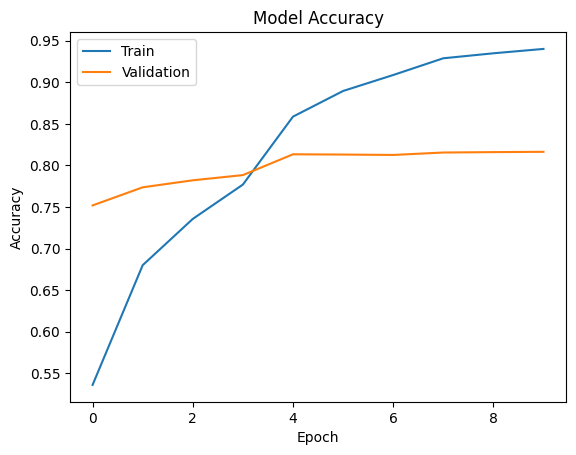

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()



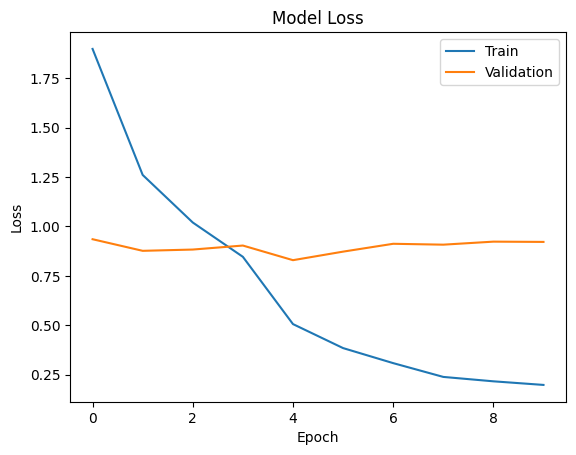

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
model.save("cnn_model.h5")

Model 3

In [5]:

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = r"D:\ML_project_data\5\model_data\train"
test_dir = r"D:\ML_project_data\5\model_data\test"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [6]:
import tensorflow as tf

def dataset_info(dataset):
    # Try to get number of batches
    try:
        num_batches = tf.data.experimental.cardinality(dataset).numpy()
    except:
        num_batches = "Unknown"

    # Get batch size from first batch
    for batch_images, batch_labels in dataset.take(1):
        batch_size = batch_images.shape[0]

    # Count exact number of images
    total_images = 0
    for batch_images, batch_labels in dataset:
        total_images += batch_images.shape[0]

    print(f"Number of batches (approx): {num_batches}")
    print(f"Batch size: {batch_size}")
    print(f"Exact total number of images: {total_images}")
    return num_batches, batch_size, total_images
dataset_info(train_ds)


KeyboardInterrupt: 

In [18]:
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

# -----------------------------
# 1️⃣ Load EfficientNetV2 backbone
# -----------------------------
base_model = EfficientNetV2B0(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

# Freeze backbone initially
base_model.trainable = False

# -----------------------------
# 2️⃣ Build classifier on top
# -----------------------------
inputs = Input(shape=(224,224,3))
x = preprocess_input(inputs)              # Preprocess inputs
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(101, activation='softmax')(x)  # 101 classes

model = Model(inputs, outputs)

# -----------------------------
# 3️⃣ Compile model
# -----------------------------
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# -----------------------------
# 4️⃣ Model summary
# -----------------------------
model.summary()



24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │        51,813 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,626,997 (25.28 MB)

 Trainable params: 707,685 (2.70 MB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [19]:
import tensorflow as tf

# Paths to your folders
train_dir = r"D:\ML_project_data\5\model_data\train"
test_dir  = r"D:\ML_project_data\5\model_data\test"

# Hyperparameters
img_size = (224, 224)
batch_size = 32

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',  # integer labels for sparse_categorical_crossentropy
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# Load validation/test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)


Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [20]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y))
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [21]:
epochs = 10  # Start with 10 epochs
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1903s 799ms/step - accuracy: 0.3931 - loss: 2.6017 - val_accuracy: 0.6192 - val_loss: 1.5320
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1874s 791ms/step - accuracy: 0.5464 - loss: 1.7781 - val_accuracy: 0.6661 - val_loss: 1.2901
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1837s 776ms/step - accuracy: 0.5906 - loss: 1.5826 - val_accuracy: 0.6882 - val_loss: 1.1836
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1864s 787ms/step - accuracy: 0.6142 - loss: 1.4728 - val_accuracy: 0.7022 - val_loss: 1.1151
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1837s 776ms/step - accuracy: 0.6345 - loss: 1.3963 - val_accuracy: 0.7150 - val_loss: 1.0681
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1839s 777ms/step - accuracy: 0.6483 - loss: 1.3338 - val_accuracy: 0.7204 - val_loss: 1.0386
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1772s 749ms/step - accuracy: 0.6617 - loss: 1.2838 - val_accuracy: 0.7265 - val_loss: 1.0123
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 1881s 795ms/s

In [24]:
model.save(
    r"C:\Users\Admin\Desktop\My_FIRST_ML_PROJECT_   EVERRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR\saved_model.keras"
)

In [6]:
def preprocess(ds):
    return ds.map(lambda x, y: (preprocess_input(x), y))

train_ds_prep = preprocess(train_ds)
test_ds_prep  = preprocess(test_ds)

In [7]:
import numpy as np

def extract_features(dataset, model):
    features = []
    labels = []

    for batch_images, batch_labels in dataset:
        batch_features = model(batch_images, training=False)
        batch_features = tf.reduce_mean(batch_features, axis=[1, 2])  # GAP
        features.append(batch_features.numpy())
        labels.append(batch_labels.numpy())

    return np.vstack(features), np.concatenate(labels)


In [9]:
# Take subsets of 3000 samples each for faster training (~3k train, ~3k test)
train_ds_prep = train_ds_prep.take(63)
test_ds_prep = test_ds_prep.take(32)

X_train, y_train = extract_features(train_ds_prep, base_model)
X_test, y_test   = extract_features(test_ds_prep, base_model)


print(X_train.shape)  # (num_samples, 2048)
print(y_train.shape)

(2016, 2048)
(2016,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory


IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    r"D:\ML_project_data\5\model_data\train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = image_dataset_from_directory(
    r"D:\ML_project_data\5\model_data\test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Preprocess images for ResNet50
def preprocess(ds):
    return ds.map(lambda x, y: (preprocess_input(x), y))

train_ds = preprocess(train_ds)
test_ds  = preprocess(test_ds)


Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [12]:
# Load ResNet50 base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze all layers first
base_model.trainable = False

# Add classifier on top
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(101, activation='softmax')(x)

model = Model(inputs, outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5  # fast initial training
)


Epoch 1/5
  54/2368 ━━━━━━━━━━━━━━━━━━━━ 1:10:32 2s/step - accuracy: 0.0554 - loss: 4.8541

KeyboardInterrupt: 